In [76]:
%matplotlib inline
#from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten

In [57]:
def auto_canny(image, sigma=0.33):
        # compute the median of the single channel pixel intensities
        v = np.median(image)

        # apply automatic Canny edge detection using the computed median
        lower = int(max(0, (1.0 - sigma) * v))
        upper = int(min(255, (1.0 + sigma) * v))
        edged = cv2.Canny(image, lower, upper)

        # return the edged image
        return edged

In [58]:
img = cv2.imread('Ferrari2.png',0)
width,height=img.shape
print width,height
edges=auto_canny(img)
print edges.shape

455 813
(455, 813)


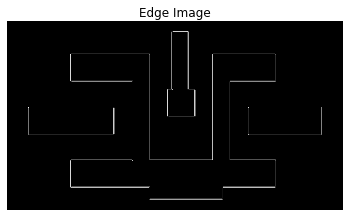

In [59]:
#plt.subplot(121),plt.imshow(img,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.imshow(edges,cmap = 'gray')
plt.show()

In [60]:
ans = []
for y in range(0, edges.shape[0]):
    for x in range(0, edges.shape[1]):
        if edges[y, x] != 0:
            ans = ans + [[x, y]]
ans = np.array(ans)
ans.shape

(6320, 2)

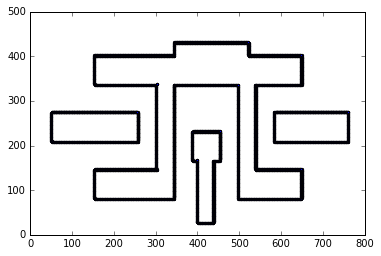

In [61]:
plt.scatter(ans[:,0],ans[:,1],marker='.')

In [62]:
print min(ans[:,0])
print max(ans[:,0])

51
760


In [63]:
print min(ans[:,1])
print max(ans[:,1])

27
432


In [64]:
img = cv2.imread('Ferrari2.png',0)
img = np.float32(img)
corners = cv2.cornerHarris(img,2,3,0.04)
print corners.shape
crit=0.01*corners.max()
print crit
print img[10,10]
img[corners > crit] = 10

(455, 813)
309596.8
255.0


In [65]:
target0 = []
for y in range(0, corners.shape[1]):
    for x in range(0, corners.shape[0]):   
        if corners[x, y] >crit:
            target0 = target0 + [[y, x]]
target0 = np.array(target0)
print target0.shape


(200, 2)


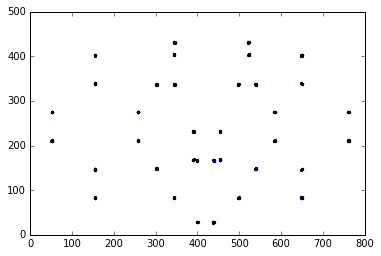

In [66]:
plt.scatter(target0[:,0],target0[:,1],marker='.')

(<matplotlib.text.Text at 0x11b66d910>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

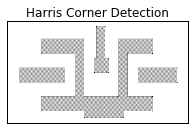

In [67]:
plt.subplot(2,1,1), plt.imshow(img ,cmap = 'gray')
plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])

In [68]:
img2 = cv2.imread('Ferrari2.png')
corners2 = cv2.dilate(corners, None, iterations=1)
print corners2.shape
print corners2.max()
crit=0.01*corners2.max()
print crit
print corners2[10,10]
img2[corners2 > crit] = [255,0,0]

(455, 813)
3.09597e+07
309596.8
0.0


In [69]:
target = []
for y in range(0, corners2.shape[1]):
    for x in range(0, corners2.shape[0]):   
        if corners2[x, y] >crit:
            target = target + [[y, x]]
target = np.array(target)
print target.shape
#print target[0:100,:]


(780, 2)


In [70]:
def unique_list(l):
  x = []
  for a in l:
    if a not in x:
      x.append(a)
  return x
targetX=unique_list(target[:,0])
print len(targetX),sorted(targetX)
targetY=unique_list(target[:,1])
print
print len(targetY),sorted(targetY)

80 [50, 51, 52, 53, 54, 153, 154, 155, 156, 157, 256, 257, 258, 259, 260, 301, 302, 303, 304, 305, 342, 343, 344, 345, 346, 347, 388, 389, 390, 391, 392, 397, 398, 399, 400, 401, 402, 436, 437, 438, 439, 440, 441, 452, 453, 454, 455, 456, 496, 497, 498, 499, 500, 501, 519, 520, 521, 522, 523, 524, 537, 538, 539, 540, 541, 583, 584, 585, 586, 587, 647, 648, 649, 650, 651, 759, 760, 761, 762, 763]

54 [26, 27, 28, 29, 30, 81, 82, 83, 84, 85, 145, 146, 147, 148, 149, 150, 165, 166, 167, 168, 169, 170, 209, 210, 211, 212, 213, 230, 231, 232, 233, 234, 273, 274, 275, 276, 277, 335, 336, 337, 338, 339, 340, 400, 401, 402, 403, 404, 405, 429, 430, 431, 432, 433]


(<matplotlib.text.Text at 0x11d444990>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

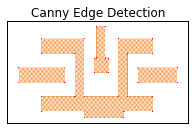

In [71]:
plt.subplot(2,1,2),plt.imshow(img2,cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

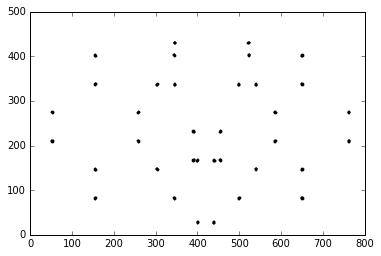

In [72]:
plt.scatter(target[:,0],target[:,1],marker='.',s=1)

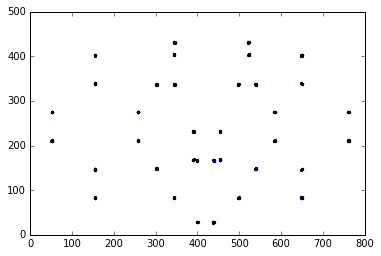

In [73]:
plt.scatter(target0[:,0],target0[:,1],marker='.')

In [43]:
print target0.shape
print target.shape

(210, 2)
(788, 2)


In [94]:
centroid, tmp = kmeans(target0+0.0, 30)

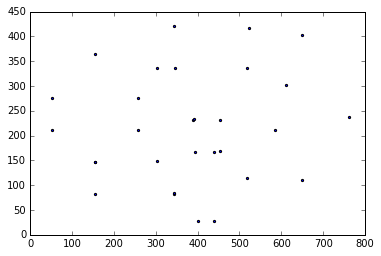

In [95]:
plt.scatter(centroid[:,0],centroid[:,1],marker='.')